# Assignment Week - 01

First step, we import all the libraries we are going to use throughout the notebook and prepare the csv files in order to start the Data cleaning step. steps.csv file is in a European delimited format which are seperated by ";" instead of ",". Therefor we use the (sep = ";") when we are loading the file into a dataframe

In [170]:
# importing all libraries we are going to use throughout the Notebook
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

# loading csv files into Pandas data frames
df_steps = pd.read_csv("steps.csv", sep = ";")
df_survey = pd.read_csv("survey.csv")

We view the first 5 cases (rows) of each data frame.

In [171]:
df_steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df_survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


We merge these two data frames to get one master data frame containing all the information

In [185]:
df = pd.merge(df_steps, df_survey, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In order to calculate the Mean steps per day, we transpose the columns. the dates are spread horizentally. 
In the following blocks, we transpose the cells to get the value of each date. Then place those valuse inside a list and itirate through the original Dataframe to get the mean.

In [214]:
df_set = df.transpose()
df_set
df_set["date"] = df_set.index
df_set["date"].unique()

array(['id', '20-6-2013', '21-6-2013', '22-6-2013', '23-6-2013',
       '24-6-2013', '25-6-2013', '26-6-2013', '27-6-2013', '28-6-2013',
       '29-6-2013', '30-6-2013', '1-7-2013', '2-7-2013', '3-7-2013',
       '4-7-2013', '5-7-2013', '6-7-2013', '7-7-2013', '8-7-2013',
       '9-7-2013', '10-7-2013', '11-7-2013', '12-7-2013', '13-7-2013',
       '14-7-2013', '15-7-2013', '16-7-2013', '17-7-2013', '18-7-2013',
       '19-7-2013', '20-7-2013', '21-7-2013', '22-7-2013', '23-7-2013',
       '24-7-2013', '25-7-2013', '26-7-2013', '27-7-2013', '28-7-2013',
       '29-7-2013', '30-7-2013', '31-7-2013', '1-8-2013', '2-8-2013',
       '3-8-2013', '4-8-2013', '5-8-2013', '6-8-2013', '7-8-2013',
       '8-8-2013', '9-8-2013', '10-8-2013', '11-8-2013', '12-8-2013',
       '13-8-2013', '14-8-2013', '15-8-2013', '16-8-2013', '17-8-2013',
       '18-8-2013', '19-8-2013', '20-8-2013', '21-8-2013', '22-8-2013',
       '23-8-2013', '24-8-2013', '25-8-2013', '26-8-2013', '27-8-2013',
       '28-8-2013

In [215]:
to_drop = ["id","city", "gender", "age", "hh_size", "education", "education_1", "height", "weight"]
df_set = df_set.drop(to_drop)
df_set["date"].unique()

array(['20-6-2013', '21-6-2013', '22-6-2013', '23-6-2013', '24-6-2013',
       '25-6-2013', '26-6-2013', '27-6-2013', '28-6-2013', '29-6-2013',
       '30-6-2013', '1-7-2013', '2-7-2013', '3-7-2013', '4-7-2013',
       '5-7-2013', '6-7-2013', '7-7-2013', '8-7-2013', '9-7-2013',
       '10-7-2013', '11-7-2013', '12-7-2013', '13-7-2013', '14-7-2013',
       '15-7-2013', '16-7-2013', '17-7-2013', '18-7-2013', '19-7-2013',
       '20-7-2013', '21-7-2013', '22-7-2013', '23-7-2013', '24-7-2013',
       '25-7-2013', '26-7-2013', '27-7-2013', '28-7-2013', '29-7-2013',
       '30-7-2013', '31-7-2013', '1-8-2013', '2-8-2013', '3-8-2013',
       '4-8-2013', '5-8-2013', '6-8-2013', '7-8-2013', '8-8-2013',
       '9-8-2013', '10-8-2013', '11-8-2013', '12-8-2013', '13-8-2013',
       '14-8-2013', '15-8-2013', '16-8-2013', '17-8-2013', '18-8-2013',
       '19-8-2013', '20-8-2013', '21-8-2013', '22-8-2013', '23-8-2013',
       '24-8-2013', '25-8-2013', '26-8-2013', '27-8-2013', '28-8-2013',
       '29

In [216]:
df_set = df.transpose()
df_set["Date"] = df_set.index
to_drop = ["id","city", "gender", "age", "hh_size", "education", "education_1", "height", "weight"]
df_set = df_set.drop(to_drop)
days = df_set["Date"].unique()

In [220]:
new_list = []
for item in days:
    steps_mean = df[item].mean()
    temp_dict = {"day" : item, "mean" : steps_mean}
    new_list.append(temp_dict)

df_set = pd.DataFrame(new_list)
df_set["day"] = pd.to_datetime(df_set["day"])


Now we end up with a new data frame that contains the day and the mean of steps per day

In [221]:
df_set.head()

,day,mean
0,2013-06-20,3642.416667
1,2013-06-21,9034.724280
2,2013-06-22,10889.636691
3,2013-06-23,7402.847973
4,2013-06-24,8110.370056


We use a scatter plot to represtent a timeline of mean of steps per day.

Withe the graphical representation, we notice Outliers that are goin between 20000 and 30000 step

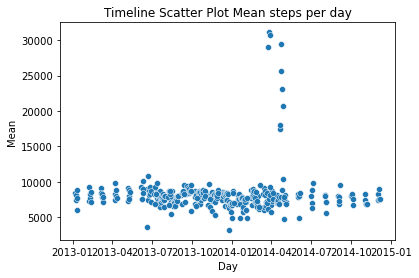

In [218]:
sns.scatterplot(data = df_set, x = "day", y = "mean")
plt.title('Timeline Scatter Plot Mean steps per day')
plt.xlabel("Day")
plt.ylabel("Mean")
plt.show()

Now we calculate the Mean of our average steps. The median, the variance of our sample population and our standard deviation. Which is the squareroot of our variance.

Note: Mathmatic formulas markdown is not working

In [222]:
mean_steps = df_set["mean"].mean()
median_steps = df_set["mean"].median()
variance_steps = df_set["mean"].var()
standard_deviation = math.sqrt(variance_steps)
print("the mean of steps per day is:", mean_steps, "steps")
print("the median of steps per day is:", median_steps, "steps")
print("the variance of steps per day is:", variance_steps)
print("the standard deviation is:", standard_deviation)

the mean of steps per day is: 8202.974536861735 steps
the median of steps per day is: 7856.073033707865 steps
the variance of steps per day is: 9783902.178617552
the standard deviation is: 3127.9229815674094


Now we create a histogram to represent our our mean steps per day. And we super impose it with a density plot.

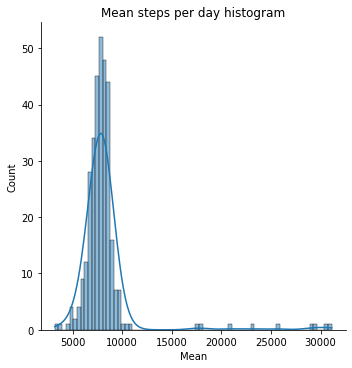

In [224]:
sns.displot(data = df_set, x = "mean", kde = True)
plt.title('Mean steps per day histogram')
plt.xlabel("Mean")
plt.show()

We notice the plot is left skewed so we add the mean and the median previously calculated to the plot. We remove the bars and change the kind property of the plot with kind = kde for better visualtisation. We notice the Median is slightly bigger than the Mean. (Median < Mean)

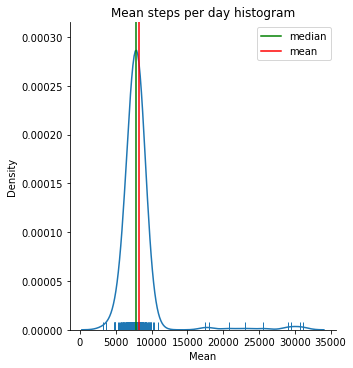

In [234]:
sns.displot(data = df_set, x = "mean", kind = "kde", rug = True)
plt.title('Mean steps per day histogram')
plt.xlabel("Mean")
plt.axvline(median_steps, 0, 100, color='green', label='median')
plt.axvline(mean_steps, 0, 100, color='red', label='mean')
plt.legend()
plt.show()

Then we finally add a box plot to visualise the distributiob of the data. And super impose it with Mean and Median previously calculated. we notice a couple of outliers also but the high concentration of data points is between 5000 and 10000 steps.

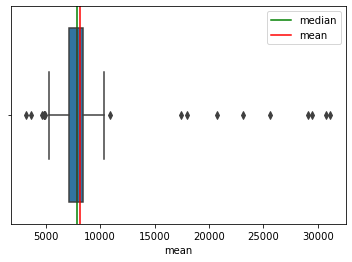

In [198]:
sns.boxplot(data = df_set, x = "mean")
plt.axvline(median_steps, 0, 100, color='green', label='median')
plt.axvline(mean_steps, 0, 100, color='red', label='mean')
plt.legend()
plt.show()